# Manually Plot Feature Importance

A trained XGBoost model automatically calculates feature importance on your predictive modeling problem. These importance scores are available in the feature importances member variable of the trained model. 

[ 0.089701    0.17109634  0.08139535  0.04651163  0.10465116  0.2026578
  0.1627907   0.14119601]


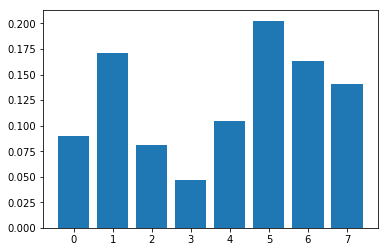

In [1]:
#Load Libraries
from pandas import read_csv
from xgboost import XGBClassifier
from matplotlib import pyplot

#Load Data and split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data = read_csv(url, header=None, delimiter = ",")
X = data.values[:,0:8]
Y = data.values[:,8]

#Fit model
model = XGBClassifier()
model.fit(X, Y)

#Feature Importance
print(model.feature_importances_)

#plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

A downside of this plot is that the features are ordered by their input index rather than their importance. We could sort the features before plotting. Thankfully, there is a built in plot function to help us.

# Using Built-in XGBoost Feature Importance Plot

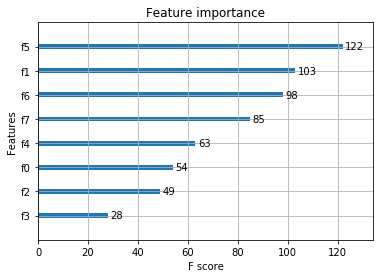

In [2]:
from pandas import read_csv
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

#Load Data and split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data = read_csv(url, header=None, delimiter = ",")
X = data.values[:,0:8]
Y = data.values[:,8]

#Fit model
model = XGBClassifier()
model.fit(X, Y)

#plot feature importance
plot_importance(model)
pyplot.show()

Manually mapping these indices to names in the problem description1, we can see that the plot shows F5 (body mass index) has the highest importance and F3 (skin fold thickness) has the lowest importance.

# Feature Selection with XGBoost Feature Importance Scores

Feature importance scores can be used for feature selection in scikit-learn. This is done using the SelectFromModel class that takes a model and can transform a dataset into a subset with selected features. 

In [4]:
#Load Libraries
from pandas import read_csv
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

#Load Data and split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data = read_csv(url, header=None, delimiter = ",")
X = data.values[:,0:8]
Y = data.values[:,8]

#Fit model
model = XGBClassifier()
model.fit(X, Y)

#plot feature importance
plot_importance(model)
pyplot.show()

